# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

# TME 3X - Corrélation, régression linéaire

<div class="alert alert-block alert-warning">
Dans ce TME, nous allons étudier la corrélation entre deux variables et la régression linéaire.
</div>
<div class="alert alert-block alert-warning">
Voici le plan :
    <ol>
        <li>Chargement de données à partir d'un fichier</li>
        <li>Visualisation d'un nuage de points</li>
        <li>Calcul d'une covariance et d'un coefficient de corrélation linéaire</li>
        <li>Visualiser une droite</li>
        <li>Moindres carrés</li>
        <li>Ajustement</li>
        <li>Traitement des deux autres variables
    </ol>
</div>

<div class="alert alert-block alert-info">
Tout d'abord, exécuter la boite ci-dessous pour importer les bibliothèques nécessaires.
</div>

In [19]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## 1 - Chargement de données à partir d'un fichier

<div class="alert alert-block alert-warning">
Les données nécessaires à ce TME sont stockées dans le fichier <code>advertising.csv</code> qui se présente ainsi :
<pre>
TV,Radio,Newspaper,Sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12
151.5,41.3,58.5,16.5
...
</pre>
    Il contient quatre colonnes. Les trois premières sont une mesure de la quantité de publicité diffusée respectivement à la télévision, à la radio et dans les journaux. La dernière colonne mesure les ventes.
    <br/><em>Source : <a href="https://www.kaggle.com/ashydv/advertising-dataset">https://www.kaggle.com/ashydv/advertising-dataset</a></em>
</div>
<div class="alert alert-block alert-info">
    Q1.1 - Charger les données du fichier dans une variable <code>data_pub</code> à l'aide de la fonction <code>pd.read_csv('nom_de_fichier.csv')</code>.
</div>

In [20]:
data_pub = pd.read_csv('advertising.csv')
data_pub

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


<div class="alert alert-block alert-info">
    Q1.2 - Définir la variable <code>tv</code> pour qu'elle contienne le vecteur NumPy de la colonne <code>'TV'</code>.
</div>

In [27]:
tv = data_pub['TV']
tv

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
5        8.7
6       57.5
7      120.2
8        8.6
9      199.8
10      66.1
11     214.7
12      23.8
13      97.5
14     204.1
15     195.4
16      67.8
17     281.4
18      69.2
19     147.3
20     218.4
21     237.4
22      13.2
23     228.3
24      62.3
25     262.9
26     142.9
27     240.1
28     248.8
29      70.6
       ...  
170     50.0
171    164.5
172     19.6
173    168.4
174    222.4
175    276.9
176    248.4
177    170.2
178    276.7
179    165.6
180    156.6
181    218.5
182     56.2
183    287.6
184    253.8
185    205.0
186    139.5
187    191.1
188    286.0
189     18.7
190     39.5
191     75.5
192     17.2
193    166.8
194    149.7
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

<div class="alert alert-block alert-info">
    Q1.3 - Définir la variable <code>ventes</code> correspondant à cette série de données.
</div>

In [28]:
ventes = data_pub['Sales']
ventes

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
5       7.2
6      11.8
7      13.2
8       4.8
9      15.6
10     12.6
11     17.4
12      9.2
13     13.7
14     19.0
15     22.4
16     12.5
17     24.4
18     11.3
19     14.6
20     18.0
21     17.5
22      5.6
23     20.5
24      9.7
25     17.0
26     15.0
27     20.9
28     18.9
29     10.5
       ... 
170     8.4
171    17.5
172     7.6
173    16.7
174    16.5
175    27.0
176    20.2
177    16.7
178    16.8
179    17.6
180    15.5
181    17.2
182     8.7
183    26.2
184    17.6
185    22.6
186    10.3
187    17.3
188    20.9
189     6.7
190    10.8
191    11.9
192     5.9
193    19.6
194    17.3
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

## 2 - Visualisation d'un nuage de points
<div class="alert alert-block alert-warning">
    Dans la partie précédente, vous devez avoir défini les deux séries de données <code>tv</code> et <code>ventes</code> que nous allons visualiser.
</div>

<div class="alert alert-block alert-info">
Q2.1 - Écrire la définition de la fonction <code>fig_nuage</code> qui prend en paramètres deux vecteurs de nombres <code>x</code> et <code>y</code> de même taille et qui affiche le nuage de points correspondant.
</div>

In [29]:
def fig_nuage(x,y):
    return plt.scatter(x,y)

<div class="alert alert-block alert-info">
    Q2.2 - Appliquer la fonction <code>fig_nuage</code> pour visualiser les ventes en fonction de la publicité à la télévision.
</div>

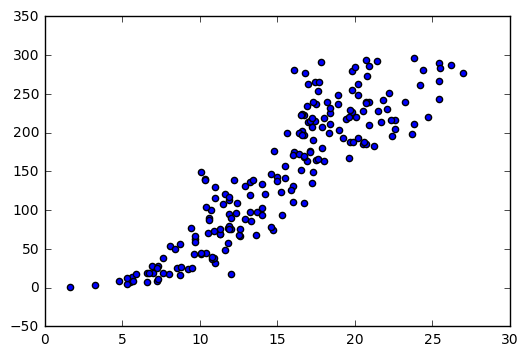

In [30]:
fig_nuage(ventes, tv)

## 3 - Calcul d'une covariance et d'un coefficient de corrélation linéaire

<div class="alert alert-block alert-info">
    Q3.1 - Calculer la moyenne de la variable <code>tv</code>.
</div>

In [46]:
moyenne_tv = (1./len(tv))*(np.sum(tv))
moyenne_tv

147.0425

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir une valeur très proche de :
<pre>
147.0425
</pre>
</div>

<div class="alert alert-block alert-info">
    Q3.2 - Calculer la variance de la variable <code>tv</code>.
</div>

In [48]:
variance_tv = (1./len(tv))*np.sum((tv - moyenne_tv)**2)
variance_tv

7334.095143750001

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir une valeur très proche de :
<pre>
7334.09514375
</pre>
</div>

<div class="alert alert-block alert-info">
    Q3.3 - Écrire la fonction <code>cov</code> qui étant données deux vecteurs d'observations <code>x</code> et <code>y</code> de même taille, retourne la covariance de ces deux variables.
    On rappelle la formule de la covariance : $$cov(\mathbf{x}, \mathbf{y}) = \frac{1}{n} \sum_{i = 1}^{n}(x_i - \bar{\mathbf{x}})(y_i - \bar{\mathbf{y}})$$
</div>

In [51]:
def cov(x,y):
    return ((1./len(x))*np.sum(x*y)) - ((1./len(x))*np.sum(x))*((1./len(y))*np.sum(y))

<div class="alert alert-block alert-info">
    Q3.4 - Appliquer la fonction <code>cov</code> pour calculer la covariance des variables <code>tv</code> et <code>ventes</code>.
</div>

In [52]:
cov(tv, ventes)

406.7839037499998

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir une valeur très proche de :
<pre>
406.78390375000004
</pre>
</div>

<div class="alert alert-block alert-info">
    Q3.5 - Sans utiliser <code>np.corrcoef</code>, écrire une fonction qui étant donné deux vecteurs d'observations <code>x</code> et <code>y</code>, retourne le coefficient de corrélation entre <code>x</code> et <code>y</code>.
    On rappelle la formule du coefficient de corrélation :
    $$\displaystyle cor(\mathbf{x}, \mathbf{y}) = \frac{cov(\mathbf{x}, \mathbf{y})}{\sqrt{var(\mathbf{x}).var(\mathbf{y})}}$$
</div>

In [55]:
def cor(x,y):
    return (cov(x,y)/np.sqrt(np.var(x)*np.var(y)))

<div class="alert alert-block alert-info">
    Q3.6 - Appliquer la fonction <code>cor</code> pour calculer le coefficient de corrélation linéaire entre les variables <code>tv</code> et <code>ventes</code>.
</div>

In [56]:
cor(tv, ventes)

0.9012079133023304

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir une valeur très proche de :
<pre>
0.901207913302331
</pre>
</div>

<div class="alert alert-block alert-info">
    Q3.7 - Vérifier le résultat du calcul du coefficient de corrélation linéaire à l'aide de la fonction <code>.corrcoef()</code>
</div>

In [57]:
np.corrcoef(tv, ventes)

array([[1.        , 0.90120791],
       [0.90120791, 1.        ]])

## 4 - Visualiser une droite

<div class="alert alert-block alert-info">
Q4.1 - Écrire la définition de la fonction <code>fig_droite</code> qui prend en paramètres un couple de coefficients $(m, p)$ nommé <code>coefs</code> puis <code>xmin</code> et <code>xmax</code> et qui affiche le graphe de la droite $y = mx + p$ pour des abscisses comprises entre $x_{min}$ et $x_{max}$.
</div>

In [195]:
def fig_droite(m, p, xmin, xmax):
    y1 = m*xmin + p
    y2 = m*xmax + p
    plt.plot((xmin, xmax),(y1, y2), color='Red')

<div class="alert alert-block alert-info">
Q4.2 - Appliquer la fonction <code>fig_droite</code> pour visualiser la droite d'équation $y = 3x - 200$ pour les valeurs de $x$ entre $0$ et $300$.
</div>

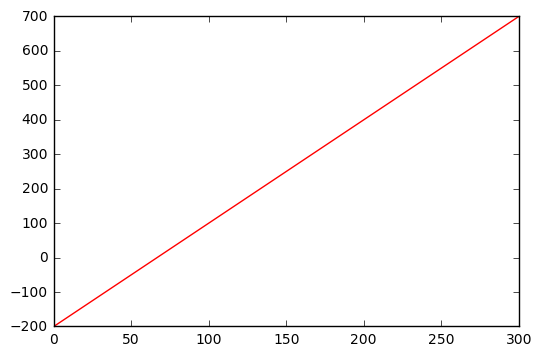

In [196]:
fig_droite(3, -200, 0, 300)

## 5 - Moindres carrés

<div class="alert alert-block alert-info">
Q5.1 - Écrire la définition de la fonction <code>regression_mc</code> qui, étant donné deux vecteurs d'observations <code>x</code> et <code>y</code> de même taille $n$, retourne le couple de coefficients <code>(m, p)</code> de la droite de régression $y = mx + p$ qui minimise le critère des moindres carrés $\sum_{i = 1}^{n} (y_i - (m.x_i + p))^2$.
On rappelle que les coefficients qui minimisent le critère des moindres carrés sont :
    $$m^* = \frac{cov(\mathbf{x}, \mathbf{y})}{var(\mathbf{x})} \text{ et } p^* = \bar{\mathbf{y}} - m^*.\bar{\mathbf{x}}$$
</div>

In [106]:
def regression_mc(x,y):
    m = cov(x,y)/np.var(x)
    p =  (np.sum(y)/len(y)) - m * (np.sum(x)/len(x))
    coeff = m,p
    return coeff

<div class="alert alert-block alert-info">
Q5.2 - Appliquer la fonction <code>regression_mc</code> pour calculer les coefficients de la régression de <code>ventes</code> en fonction de <code>tv</code>.
</div>

In [107]:
regression_mc(tv, ventes)

(0.055464770469558784, 6.974821488229905)

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir des valeurs très proches de :
<pre>
(0.05546477046955886, 6.9748214882298925)
</pre>
</div>

<div class="alert alert-block alert-info">
Q5.3 - Écrire la définition de la fonction <code>fig_regression</code> qui, étant donné deux vecteurs d'observations <code>x</code> et <code>y</code> de même taille, génère le  graphique avec le nuage de points et la droite de régression par les moindres carrés en rouge.
</div>

In [161]:
def fig_regression(x,y):
    fig_nuage(x,y) 
    m, p = regression_mc(x,y)
    fig_droite(m, p, np.min(x), np.max(x))

<div class="alert alert-block alert-info">
Q5.4 - Appliquer la fonction <code>fig_regression</code> pour visualiser le nuage de points de <code>ventes</code> en fonction de <code>tv</code> ainsi que la droite de régression sur le même graphique.
</div>

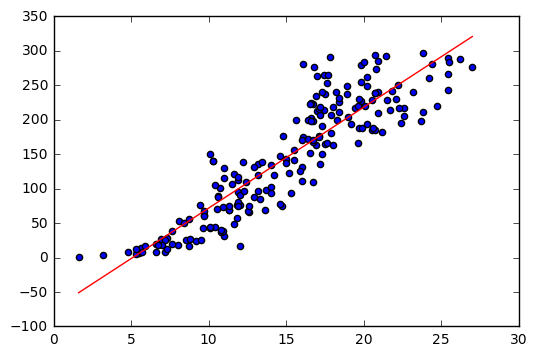

In [162]:
fig_regression(ventes,tv)

<div class="alert alert-block alert-info">
Q5.5 - Refaire les deux questions précédentes pour visualiser, sur un même graphique, le nuage de points, la droite de régression de <code>ventes</code> en fonction de <code>tv</code> en rouge et la droite de régression de <code>tv</code> en fonction de <code>ventes</code> en vert.
</div>

In [201]:
def fig_regression2(x,y):
    fig_nuage(x,y)
    m, p = regression_mc(x,y)
    fig_droite(m, p, np.min(x), np.max(x))
    n, q = regression_mc(y,x)
    fig_droite(n, q, np.min(x), np.max(x))

AttributeError: 'NoneType' object has no attribute 'color'

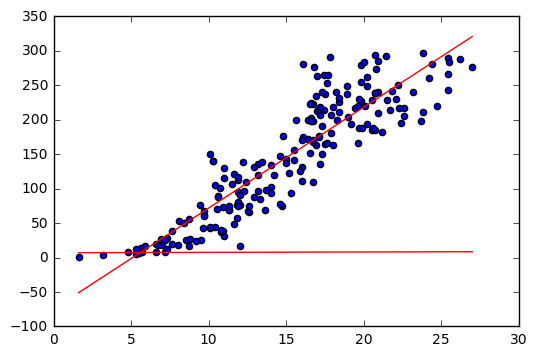

In [200]:
fig_regression2(ventes, tv)

## 6 - Ajustement

<div class="alert alert-block alert-info">
    Q6.1 - Écrire un fonction <code>r2</code> qui, étant donné deux vecteurs de mesures <code>x</code> et <code>y</code> mesure la qualité de l'approximation des $y_i = m^* x_i + p$ par :
    $$R^2 = \left( cor(p^* \mathbf{1} + m^* \mathbf{x} , \mathbf{y}) \right)^2$$
</div>

<div class="alert alert-block alert-info">
Q6.2 - Appliquer la fonction <code>r2</code> pour mesurer la qualité de l'ajustement de <code>ventes</code> en fonction de <code>tv</code> pour la méthode des moindres carrés.
</div>

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir une valeur très proche de :
<pre>
0.8121757029987419
</pre>
</div>

## 7 - Traitement des deux autres variables

<div class="alert alert-block alert-info">
Q7.1 - Visualiser la droite de régression linéraire pour les ventes en fonction de la publicité à la radio.
</div>

<div class="alert alert-block alert-info">
Q7.2 - Calculer le $R2$ de la régression précédente.
</div>

<div class="alert alert-block alert-info">
Q7.3 - Visualiser la droite de régression linéraire pour les ventes en fonction de la publicité dans les journaux.
</div>

<div class="alert alert-block alert-info">
Q7.4 - Calculer le $R2$ de la régression précédente.
</div>